# 04 Group vs Group DiffExp RPE

This notebook details processes for running differential expression analysis on each groups vs other groups in the projection.

**Expected Outputs**
 - CSV file of diffrentially expressed genes

### Initialize Environment

Import the necessary packages and output package versions:

In [1]:
# Import necessary packages
import os
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from datetime import datetime as dt

# Set verbosity and output package versions
sc.settings.verbosity = 2
sc.logging.print_header()

# Set directory
os.chdir("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/single_cell/04_differentialexpression")

2025-12-08 02:33:53.316043: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.11.3 louvain==0.8.1 pynndescent==0.5.11


In [2]:
# Set input dataset (h5ad file)
input = "03_25-12-06-01-06_clustering_RPE.h5ad"

# Create a timestamp for the output files
timestamp = dt.now()
timestamp = timestamp.strftime("%y-%m-%d-%H-%M")

# Set filename metadata for output files
dataset  = "RPE"
analysis = "gVg-diffExp"

# Toggle automatic data saving
savedata = True

**Load dataset and examine:**

AnnData object with n_obs × n_vars = 16314 × 18505
    obs: 'experiment', 'group', 'timepoint', 'infection', 'cell_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'scDblFinder_score', 'scDblFinder_class', 'gem', 'QC', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.9', 'leiden_r0.8', 'leiden_r0.7', 'leiden_r0.6', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r0.1', 'leiden_r1_as_resolved'
    var: 'mt', 'ribo', 'n_cells_by_counts-gem1', 'mean_counts-gem1', 'log1p_mean_counts-gem1', 'pct_dropout_by_counts-gem1', 'total_counts-gem1', 'log1p_total_counts-gem1', 'n_cells_by_counts-gem2', 'mean_counts-gem2', 'log1p_mean_counts-gem2', 'pct_dropout_by_counts-gem2', 'total_counts-gem2', 'log1p_total_counts-gem2', 'n_cells', 'n_count

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


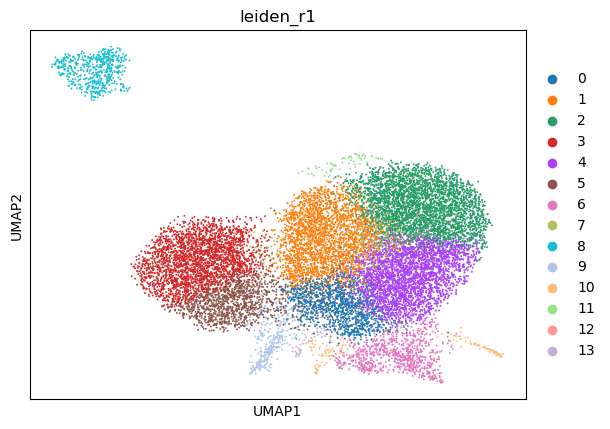

In [3]:
# Load h5ad into adata object
adata = ad.read_h5ad("../../h5ad/" + input)

# Print structure of resulting adata object
print(adata)

# Plot umap
sc.pl.umap(adata, color = "leiden_r1")

### Differential Expression Analysis

**Note:** Because of a quirk of how h5ad files are saved, it does not save the unstructured log1p metadata. To enable differential expression analysis, recreate this piece of information.

In [4]:
# If loaded from h5ad, this will result in an empty object:
print(adata.uns['log1p'])

# Correct this using the following line:
adata.uns['log1p']["base"] = None

# Confirm correction:
print(adata.uns['log1p'])

{}
{'base': None}


**Extract all leiden_r1 clusters:**

In [5]:
# Extract unique leiden clusters and order
samples = adata.obs["group"].unique().tolist()

# Define references
ref = ['Base', 'WT', 'Null']

**Loop on each cluster and do differential expression analysis against every other cluster:**

In [6]:
# Loop over each cluster, then do differential expression with that current cluster as reference, and all other groups the comparison
for cluster in ref:
    print("DE cluster " + cluster)
    groups = list(samples)
    groups.remove(cluster)
    print(groups)
    sc.tl.rank_genes_groups(adata, 'group', method='wilcoxon', key_added = 'gVg'+cluster, reference=cluster, groups=groups)
    del(groups)

DE cluster Base
['Naive', 'Null', 'WT', 'd5', 'd8']
ranking genes


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

    finished (0:00:27)
DE cluster WT
['Base', 'Naive', 'Null', 'd5', 'd8']
ranking genes


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

    finished (0:00:27)
DE cluster Null
['Base', 'Naive', 'WT', 'd5', 'd8']
ranking genes


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

    finished (0:00:27)


**Extract DEG information from adata into a dataframe:**

In [7]:
for cluster in ref:
    # Get results for each cluster
    cluster_result = sc.get.rank_genes_groups_df(adata,  key='gVg' + cluster, group = None, pval_cutoff = None, log2fc_min = None)
    # Label the reference cluster
    cluster_result['reference'] = cluster
    # Rearrange columns so reference cluster is at the leftmost column
    cluster_result = cluster_result[['reference'] + [col for col in cluster_result.columns if col != 'reference']]

    # Add the results to the results df (make results if it does not exist
    try:
        result
    except NameError:
        # result doesn't exist, create it from result.cluster
        result = cluster_result.copy()
    else:
        # df exists, append result.cluster to df
        result = pd.concat([result, cluster_result], ignore_index=True)
    # End try-catch
    
    del(cluster_result)

# End loop

#Show top 5 rows:
result.head()

,reference,group,names,scores,logfoldchanges,pvals,pvals_adj
0,Base,Naive,Rps20,37.412006,2.039501,2.492820e-306,2.306482e-302
1,Base,Naive,Rps29,37.112411,1.525036,1.771993e-301,6.558147e-298
2,Base,Naive,Rpl12,37.068150,1.691264,9.161225e-301,2.825475e-297
3,Base,Naive,Rplp1,36.662018,1.362307,2.944398e-294,7.783725e-291
4,Base,Naive,Rps28,36.017769,1.448300,4.409637e-284,7.418212e-281


**Save the results of the differential expression analysis in a CSV file and the modified adata file:**

In [8]:
if(savedata):
    # Determine the filename for the expected output CSV
    fn = "04_" + timestamp + "_" + dataset + "_" + analysis
    print("The filename for the CSV output of this notebook will be:")
    print(fn)
    print("which will be saved in the WORKDIR/csv/ folder.\n")
    
    # Export CSV
    result.to_csv("../../csv/" + fn +".csv", index = False)


The filename for the CSV output of this notebook will be:
04_25-12-08-02-33_RPE_gVg-diffExp
which will be saved in the WORKDIR/csv/ folder.

